# Membership functions

In [1]:
import numpy as np
import matplotlib.pyplot as pl

%matplotlib inline

In [2]:
class MembershipFunction:
    """
    This is a base class providing functionnalities which are common to all membership functions.
    """
    def plot(self, v_min, v_max, res=0.1):
        input_values = np.arange(v_min, v_max, res)
        output_values = map(self, input_values)
        pl.plot(input_values, output_values)
        pl.ylim((0, 1.1 * max(output_values)))
        pl.grid()

## Some examples of membership functions

- Common membership functions are "crisp" (or Boolean), "Triangular", and "Trapezoidal".

In [3]:
class CrispMF(MembershipFunction):
    """
    Crisp rectangular membership function. Provided here to see the difference between crisp and fuzzy sets.
    first_max: position of the rectangle
    width: width of the rectangle (membership = 1)
    """
    def __init__(self, first_max, width):
        self.first_max = first_max
        self.width = width
    def __call__(self, value):
        if value < self.first_max:
            return 0.0
        elif value > (self.first_max + self.width):
            return 0.0
        else:
            return 1.0

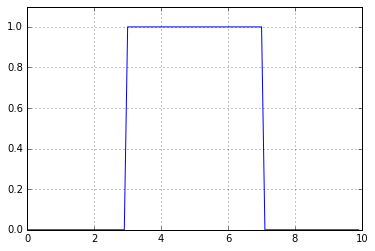

In [4]:
c = CrispMF(3, 4)
c.plot(0, 10)

In [5]:
class TriangularMF(MembershipFunction):
    """
    Triangular membership function. This function implements an isosceles triangle.
    center: position of the center of the triangle
    width: width of the base of the rectangle
    """
    def __init__(self, center, width):
        self.center = center
        self.width = width
        self.half_width = width / 2.0
        self.slope = 1.0 / self.half_width
        
    def __call__(self, value):
        if value < (self.center - self.half_width):
            return 0.0
        elif value > (self.center + self.half_width):
            return 0.0
        else:
            return 1.0 - (np.abs(value - self.center) * self.slope)


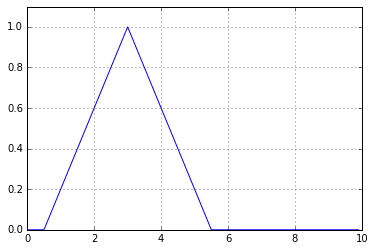

In [6]:
t = TriangularMF(3, 5)
t.plot(0, 10)

In [7]:
class TrapezoidalMF(MembershipFunction):
    """
    Trapezoidal membership function. This function implements an isosceles trapezoid.
    first_max: position of the first point where the membership function reach one (1)
    width_base: width of the base of the trapezoid
    width_top: widht of the top of the trapezoid
    """
    def __init__(self, first_max, width_base, width_top):
        self.first_max = first_max
        self.width_base = width_base
        self.width_top = width_top
        self.base_triangle = (width_base - width_top) / 2.0
        self.slope = 1.0 / self.base_triangle
    
    def __call__(self, value):
        if value < (self.first_max - self.base_triangle):
            return 0.0
        elif value < self.first_max:
            return 1.0 - ((self.first_max - value) * self.slope)
        elif value < (self.first_max + self.width_top):
            return 1.0
        elif value < (self.first_max + self.width_top + self.base_triangle):
            return 1.0 - ((value - (self.first_max + self.width_top)) * self.slope)
        else:
            return 0.0

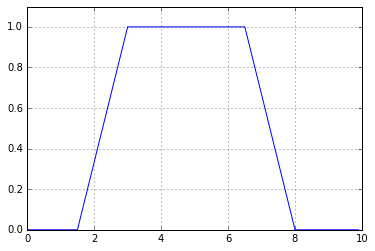

In [8]:
t = TrapezoidalMF(3, 6.5, 3.5)
t.plot(0, 10)

- Note that "crisp" and "triangular" membership functions can be represented by means of trapezoidal MFs.

## Exercise

- Test the functions above. Change the parameters of each membership funciton and observe the results.

- Using the provided functions as starting point, implement a new trapezoidal membership function without the constraint of being isosceles. In order to test your implmentation, use your function to build a membership function with a trapezoidal shape: triangular at the left and rectangular at the right.

## To further explore about membership functions... 

### Singleton MFs
                                                 |
                                                 |
                                                 |
                                  _______________|_______________
                                  
- A special membership function is the so-called "singleton", in which all the membership is "concentrated" in a single point.
    - In your opinion, what is the meaning of such a function?
    - Do you see an utility for the use of singleton membership functions?
    
### Smooth MFs
- Smoother membership functions (e.g., Gaussian, exponential, or sigmoid) are also very common in fuzzy logic.
    - In your opinion what could be the pros and cons of these smooth functions as compared to their edgier counterparts?

### Arbitrary MFs
- There is no formal need for a membership function to have a convex, coherent shape (as those explored until now). So, they could be as arbitrary as you want or need.
    - In your opinion what could be the pros and cons of using arbitrary membership functions as compared to their well-behaved counterparts?
